# Image Captioning with BLIP and Text-to-Image Generation with Stable Diffusion


 # Step 1: Install and Import Required Libraries
We'll install required libraries and import all necessary modules for BLIP and Stable Diffusion.

In [ ]:
# Install dependencies
!pip install diffusers transformers accelerate scipy safetensors --quiet

In [ ]:
# Imports for BLIP and Stable Diffusion
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from diffusers import StableDiffusionPipeline
from PIL import Image
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load BLIP processor and model

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Step 3: Load all image files from the folder

In [ ]:
image_dir = "/content/images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]

captions = []
images = []

#Step 4: Generate caption for each image

In [ ]:
for file in image_files:
    img_path = os.path.join(image_dir, file)
    image = Image.open(img_path).convert('RGB')

    inputs = processor(image, return_tensors="pt")
    out = blip_model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)

    captions.append(caption)
    images.append(image)

# Step 5: Display Images with Captions
Let's view each image alongside its generated caption using matplotlib.

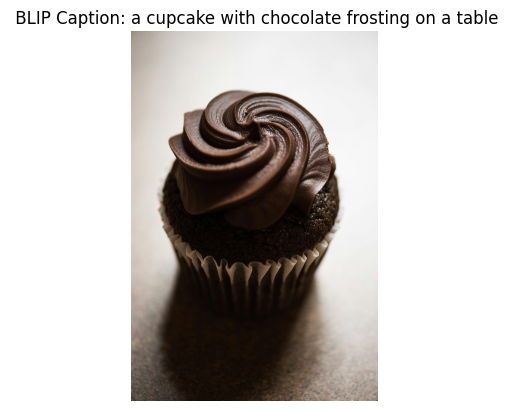

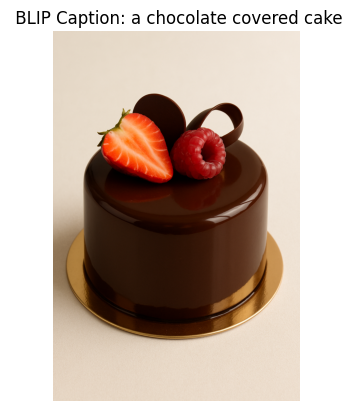

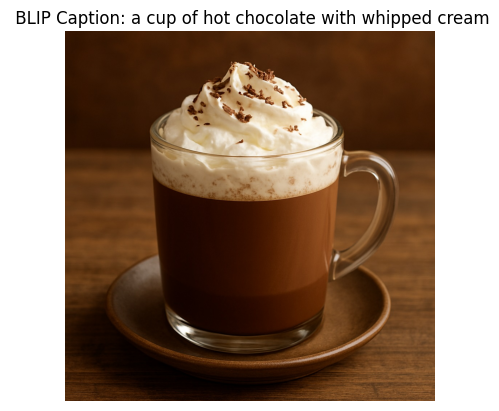

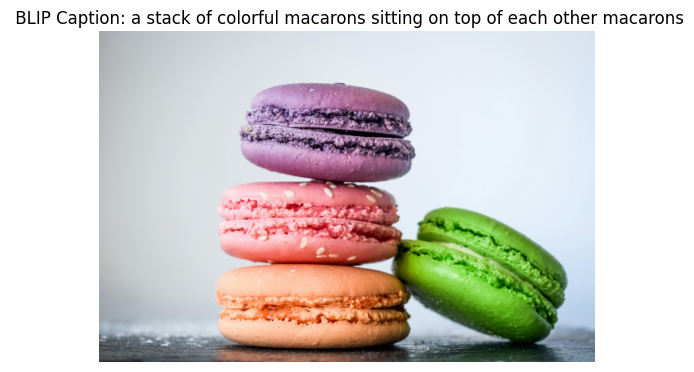

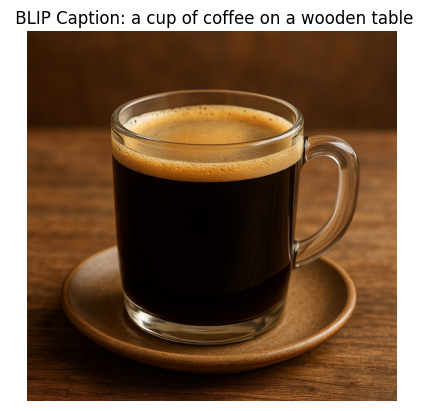

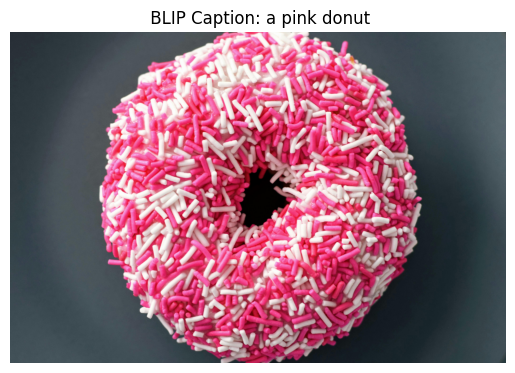

In [ ]:
# Display each image and caption
for i in range(len(images)):
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f" BLIP Caption: {captions[i]}", fontsize=12)
    plt.show()


# Step 6: Generate New Images from Captions Using Stable Diffusion
Now, we will generate entirely new images based on the captions using Stable Diffusion.

In [ ]:
# Load Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16
).to("cuda")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Step 7: Use Captions as Prompts to Generate Images


 Prompt 1: A cupcake with chocolate frosting on a table


  0%|          | 0/50 [00:00<?, ?it/s]

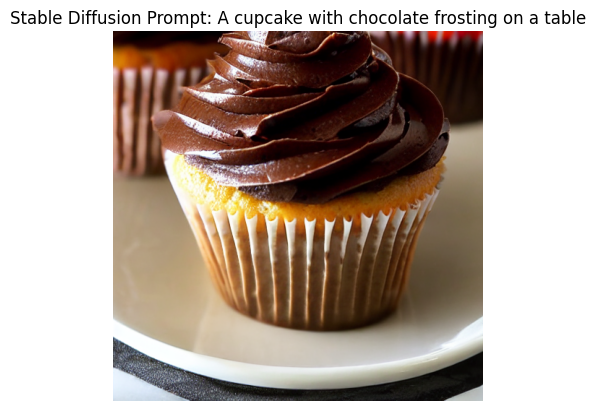

 Prompt 2: A chocolate covered cake


  0%|          | 0/50 [00:00<?, ?it/s]

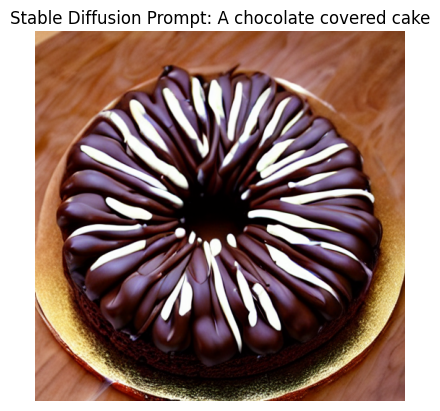

 Prompt 3: A cup of hot chocolate with whipped cream


  0%|          | 0/50 [00:00<?, ?it/s]

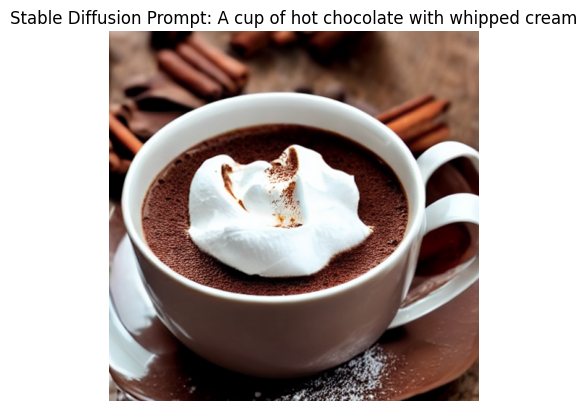

 Prompt 4: A stack of colourful macrons , sitting on top of each other macrons


  0%|          | 0/50 [00:00<?, ?it/s]

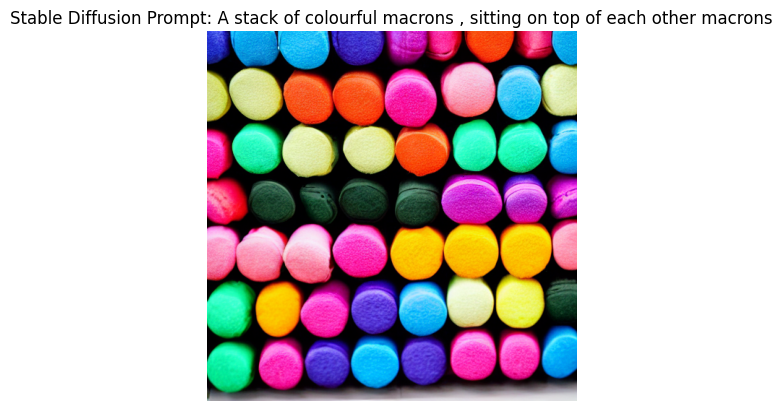

 Prompt 5: A cup of coffee on a wooden table


  0%|          | 0/50 [00:00<?, ?it/s]

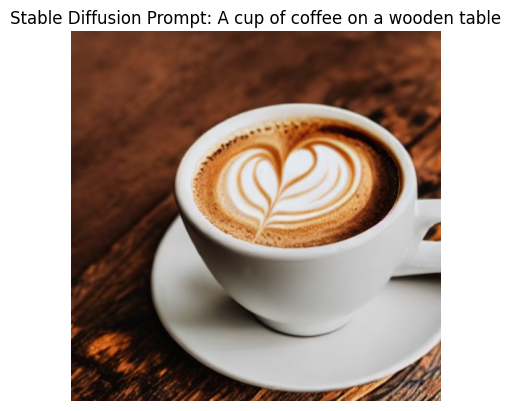

 Prompt 6: Pink donut


  0%|          | 0/50 [00:00<?, ?it/s]

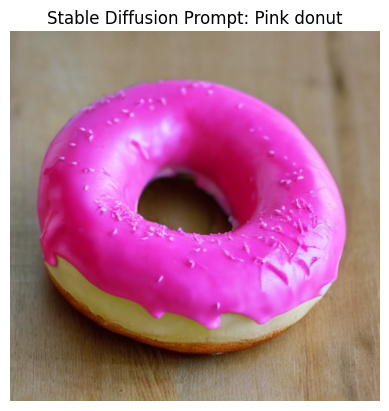

In [ ]:
prompts = [
    "A cupcake with chocolate frosting on a table",
    "A chocolate covered cake",
    "A cup of hot chocolate with whipped cream",
    "A stack of colourful macrons , sitting on top of each other macrons",
    "A cup of coffee on a wooden table",
    "Pink donut",
]

#  Generate and show images from prompts
for i, prompt in enumerate(prompts):
    print(f" Prompt {i+1}: {prompt}")
    image = pipe(prompt).images[0]
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Stable Diffusion Prompt: {prompt}", fontsize=12)
    plt.show()